In [1]:
import numpy as np
import sympy as sp
import torch
import matplotlib.pyplot as plt

x = sp.symbols('x')
sp.diff(sp.sin(x)**2, x)


2*sin(x)*cos(x)

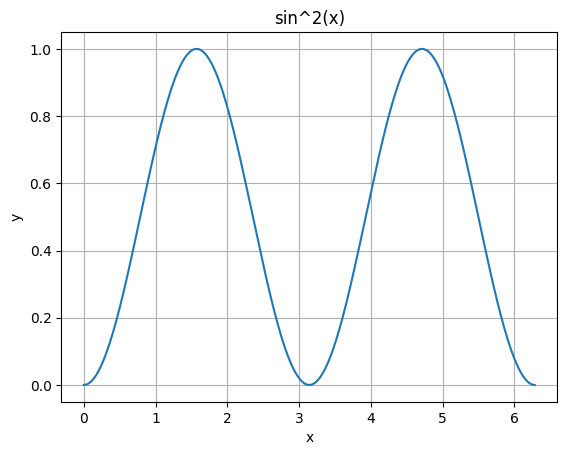

In [2]:
import numpy as np
import sympy as sp
import torch
import matplotlib.pyplot as plt
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x)**2

plt.plot(x, y)
plt.title("sin^2(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [3]:
import numpy as np
import sympy as sp
import torch
import matplotlib.pyplot as plt

t = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
t @ t


tensor([[ 7., 10.],
        [15., 22.]])

In [1]:
import numpy as np
from engine.world import World
World.mana.grid
World.matter.density

AttributeError: type object 'World' has no attribute 'mana'

In [2]:
from dataclasses import dataclass, field
from typing import List

from engine.fields.mana_field import ManaField
from engine.fields.matter_field import MatterField
from engine.fields.energy_tensor import EnergyTensor
from engine.rules.mana_rules import ManaRule
from engine.rules.matter_rules import MatterRule
from engine.rules.interaction_rules import InteractionRule

@dataclass
class World:
    mana: ManaField
    matter: MatterField
    energy: EnergyTensor

    mana_rules: List[ManaRule] = field(default_factory=list)
    matter_rules: List[MatterRule] = field(default_factory=list)
    interaction_rules: List[InteractionRule] = field(default_factory=list)

    def step(self, dt: float) -> None:
        """Apply all rules once."""
        for rule in self.mana_rules:
            rule.apply(self.mana, dt)

        for rule in self.matter_rules:
            rule.apply(self.matter, dt)

        for rule in self.interaction_rules:
            rule.apply(self.mana, self.matter, self.energy, dt)

World.mana.grid
World.matter.density

AttributeError: type object 'World' has no attribute 'mana'